# Problemas nao linearmente separaveis

- O problema de classificacao de digitos manuscritos
- O problema de classificacao de flores
- O problema de classificacao de roupas
- O problema de classificacao de carros

Esses sao alguns exemplos de problemas de classificacao que nao sao linearmente separaveis. Ou seja, nao existe uma reta que separe as classes. Nesse caso, precisamos de uma rede neural para resolver o problema, algo que enxerga relações nao lineares entre os dados.

## Multilayer Perceptron

O multilayer perceptron (MLP) e uma rede neural artificial que possui uma camada de entrada, uma ou mais camadas ocultas e uma camada de saida. Cada camada possui uma funcao de ativacao que e aplicada a cada neuronio da camada. A funcao de ativacao e responsavel por transformar a entrada em uma saida.

Backpropagation e o algoritmo que permite que a rede aprenda. Ele consiste em calcular o erro da rede e propagar esse erro para os neuronios anteriores, atualizando os pesos de cada camada. O erro e calculado atraves da funcao de custo, que e a funcao que mede o quao longe a rede esta da solucao. Exemplos de funcões de custo mais comuns sao a entropia cruzada e o erro quadratico medio.

A figura abaixo mostra um MLP com duas camadas ocultas. A primeira camada oculta possui 4 neuronios e a segunda possui 4 neuronios. A camada de saida possui 1 neuronio. 

![](https://sites.icmc.usp.br/andre/research/neural/image/camadas_an.gif)

# Arquitetura de uma rede neural

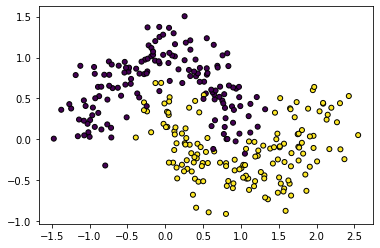

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y,  marker='o', s=25,edgecolors='k')

# nn.Sequential

A classe nn.Sequential e uma classe que permite criar uma rede neural facilmente. Ela recebe uma lista de camadas e as aplica uma a uma. A realizar um forward, a rede neural passa a entrada pela primeira camada, a saida dessa camada e a entrada da proxima camada, e assim por diante.

segue abaixo um exemplo deste modulo contendo 2 camadas Lineares intercaladas por uma função de ativação ReLU.

In [15]:
import torch
from torch import nn

input_size = 2
hidden_size = 8
output_size = 3

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden layer
                    nn.ReLU(),   # activation layer
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output layer

# o tamanho da saida de uma camada anterior tem que ser igual ao tamnho da entrada da vamada posterior


print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)


*OBS: O tamanho da saida de uma camada anterior tem que ser igual ao tamnho da entrada da vamada posterior*


In [16]:
from torchsummary import summary
summary(net, input_size=(1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 3]              27
Total params: 51
Trainable params: 51
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Forward

In [18]:
tensor = torch.from_numpy(X).float() # float64 -> float32
pred = net(tensor)
print(pred.size())

torch.Size([300, 3])


No pred.size() o primeiro valor e o tamanho do batch, o segundo e o numero de classes. O pred.size(1) retorna o numero de classes.

# Construindo uma rede com o nn.Module

A classe nn.Module e a classe base para todas as redes neurais em PyTorch. Ela possui dois metodos importantes: forward e backward. O metodo forward e responsavel por realizar o forward pass, ou seja, receber a entrada e calcular a saida. O metodo backward e responsavel por realizar o backward pass, ou seja, calcular o gradiente da funcao de custo em relacao aos pesos da rede.

In [25]:
class MinhaRede(nn.Module):
    def __init__(self, input_size, hidden_size, output_size): # a funcao __init__ é chamada quando a classe é instanciada
        super(MinhaRede, self).__init__() # chama o construtor da classe pai, nn.Module. 
        
        # o self indica atributo e metodo da classe

        # definir a arquitetura da rede
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.out = nn.Linear(hidden_size,output_size)

    def forward(self,input):
        X = torch.Tensor(input)
        # GERA UMA SAIDA A PARTIR DO X
        hidden = self.activation(self.hidden(X)) # ATIVANDO A CAMADA ESCONDIDA
        output = self.out(hidden)

        return output


In [27]:
net = MinhaRede(2,38,1)
print(net)
net.forward(X)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=38, bias=True)
  (activation): ReLU()
  (out): Linear(in_features=38, out_features=1, bias=True)
)


tensor([[ 0.0227],
        [ 0.1635],
        [-0.0862],
        [ 0.0466],
        [ 0.0694],
        [ 0.0472],
        [-0.0169],
        [-0.0910],
        [ 0.0484],
        [-0.0225],
        [ 0.0921],
        [-0.0078],
        [ 0.0511],
        [ 0.0188],
        [-0.0454],
        [ 0.0440],
        [ 0.1289],
        [ 0.0153],
        [-0.0867],
        [-0.0109],
        [-0.0699],
        [-0.1151],
        [ 0.1076],
        [ 0.1095],
        [-0.1337],
        [ 0.0080],
        [ 0.1194],
        [ 0.1427],
        [-0.0368],
        [ 0.1253],
        [ 0.0649],
        [-0.0447],
        [ 0.0552],
        [ 0.0493],
        [ 0.0234],
        [-0.1191],
        [ 0.0580],
        [-0.0785],
        [ 0.0046],
        [-0.0807],
        [-0.0963],
        [-0.0739],
        [ 0.1340],
        [-0.0612],
        [-0.0887],
        [-0.0068],
        [ 0.0620],
        [ 0.0752],
        [-0.1089],
        [ 0.0552],
        [-0.0183],
        [-0.1213],
        [ 0.